> TOC
```
Step 1. 선형 관계와 분석 방법론
Step 2. 주가 데이터 추출
Step 3. 상관 분석
     3-1. 테슬라 주가와 애플 주가간 상관 분석
     3-2. 테슬라 거래량과 애플 주가간 상관 분석
     3-3. 랜덤한 숫자와 애플 주가간 상관 분석
Step 4. 회귀 분석
     4-1. MS 주가와 애플 주가간 회귀 분석
     4-2. 전날 MS 종가와 다음날 거래량간 회귀 분석
```

## Step 1. 선형 관계와 분석 방법론

선형 관계는 X가 증가하면 Y가 증가하거나, X가 증가하면 Y가 감소하는 관계를 의미합니다. 이와 달리 X가 증가함에 따라 Y가 감소했다가 차차 증가하는 관계는 비선형이라 합니다.

그 중에서 두 데이터간의 선형 관계를 분석하는 대표적인 2가지 방법이 있습니다.
1. 상관 분석
2. 회귀 분석

상관 분석의 경우 둘 사이의 선형 관계가 있는가? 있다면 그 정도는 얼마나 강한가?를 확인하게 해줍니다. 상관 분석의 결과는 상관 계수로 나오며, 상관 계수는 -1에서 1사이의 실수값입니다.  
상관계수가 0보다 크면 양의 상관관계, 0보다 작으면 음의 상관관계가 있음을 확인한 것이며, 상관관계의 절대값이 1에 가까울수록 그 강도가 강한 것입니다.

## Step 2. 주가 데이터 추출

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import yfinance as yf

In [3]:
tickers = yf.Tickers(['TSLA','AAPL'])
stocks = tickers.history(start='2010-01-01',end='2022-01-01')
stocks

[*********************100%***********************]  2 of 2 completed


Close              Dividends             High               \
                  AAPL         TSLA      AAPL TSLA        AAPL         TSLA   
Date                                                                          
2009-12-31    6.426000          NaN       0.0  NaN    6.505895          NaN   
2010-01-04    6.526021          NaN       0.0  NaN    6.540963          NaN   
2010-01-05    6.537303          NaN       0.0  NaN    6.574201          NaN   
2010-01-06    6.433319          NaN       0.0  NaN    6.563223          NaN   
2010-01-07    6.421426          NaN       0.0  NaN    6.464728          NaN   
...                ...          ...       ...  ...         ...          ...   
2021-12-27  179.586868  1093.939941       0.0  0.0  179.676494  1117.000000   
2021-12-28  178.551147  1088.469971       0.0  0.0  180.582749  1119.000000   
2021-12-29  178.640778  1086.189941       0.0  0.0  179.885626  1104.000000   
2021-12-30  177.465622  1070.339966       0.0  0.0  179.825865  1095.550049   
2021-12-31  176.838242  1056.780029       0.0  0.0  178.491389  1082.000000   

                   Low                     Open              Stock Splits  \
                  AAPL         TSLA        AAPL         TSLA         AAPL   
Date                                                                        
2009-12-31    6.420816          NaN    6.499186          NaN          0.0   
2010-01-04    6.476316          NaN    6.508334          NaN          0.0   
2010-01-05    6.502844          NaN    6.544012          NaN          0.0   
2010-01-06    6.426610          NaN    6.537303          NaN          0.0   
2010-01-07    6.374770          NaN    6.457104          NaN          0.0   
...                ...          ...         ...          ...          ...   
2021-12-27  176.340308  1070.719971  176.360215  1073.670044          0.0   
2021-12-28  177.794285  1078.420044  179.417573  1109.489990          0.0   
2021-12-29  177.405882  1064.140015  178.590981  1098.640015          0.0   
2021-12-30  177.356075  1053.150024  178.730392  1061.329956          0.0   
2021-12-31  176.529506  1054.589966  177.356088  1073.439941          0.0   

                    Volume              
           TSLA       AAPL        TSLA  
Date                                    
2009-12-31  NaN  352410800         NaN  
2010-01-04  NaN  493729600         NaN  
2010-01-05  NaN  601904800         NaN  
2010-01-06  NaN  552160000         NaN  
2010-01-07  NaN  477131200         NaN  
...         ...        ...         ...  
2021-12-27  0.0   74919600  23715300.0  
2021-12-28  0.0   79144300  20108000.0  
2021-12-29  0.0   62348900  18718000.0  
2021-12-30  0.0   59773000  15680300.0  
2021-12-31  0.0   64062300  13577900.0  

[3022 rows x 14 columns]

In [4]:
stocks.dropna(inplace=True)
stocks

Close              Dividends             High               \
                  AAPL         TSLA      AAPL TSLA        AAPL         TSLA   
Date                                                                          
2010-06-29    7.811646     4.778000       0.0  0.0    8.062307     5.000000   
2010-06-30    7.670159     4.766000       0.0  0.0    7.866540     6.084000   
2010-07-01    7.577148     4.392000       0.0  0.0    7.769870     5.184000   
2010-07-02    7.530187     3.840000       0.0  0.0    7.651858     4.620000   
2010-07-06    7.581720     3.222000       0.0  0.0    7.708880     4.000000   
...                ...          ...       ...  ...         ...          ...   
2021-12-27  179.586868  1093.939941       0.0  0.0  179.676494  1117.000000   
2021-12-28  178.551147  1088.469971       0.0  0.0  180.582749  1119.000000   
2021-12-29  178.640778  1086.189941       0.0  0.0  179.885626  1104.000000   
2021-12-30  177.465622  1070.339966       0.0  0.0  179.825865  1095.550049   
2021-12-31  176.838242  1056.780029       0.0  0.0  178.491389  1082.000000   

                   Low                     Open              Stock Splits  \
                  AAPL         TSLA        AAPL         TSLA         AAPL   
Date                                                                        
2010-06-29    7.754623     3.508000    8.054073     3.800000          0.0   
2010-06-30    7.623809     4.660000    7.828117     5.158000          0.0   
2010-07-01    7.416750     4.054000    7.754623     5.000000          0.0   
2010-07-02    7.416138     3.742000    7.638439     4.600000          0.0   
2010-07-06    7.506400     3.166000    7.653991     4.000000          0.0   
...                ...          ...         ...          ...          ...   
2021-12-27  176.340308  1070.719971  176.360215  1073.670044          0.0   
2021-12-28  177.794285  1078.420044  179.417573  1109.489990          0.0   
2021-12-29  177.405882  1064.140015  178.590981  1098.640015          0.0   
2021-12-30  177.356075  1053.150024  178.730392  1061.329956          0.0   
2021-12-31  176.529506  1054.589966  177.356088  1073.439941          0.0   

                     Volume              
           TSLA        AAPL        TSLA  
Date                                     
2010-06-29  0.0  1133344800  93831500.0  
2010-06-30  0.0   739452000  85935500.0  
2010-07-01  0.0  1022896000  41094000.0  
2010-07-02  0.0   693842800  25699000.0  
2010-07-06  0.0   615235600  34334500.0  
...         ...         ...         ...  
2021-12-27  0.0    74919600  23715300.0  
2021-12-28  0.0    79144300  20108000.0  
2021-12-29  0.0    62348900  18718000.0  
2021-12-30  0.0    59773000  15680300.0  
2021-12-31  0.0    64062300  13577900.0  

[2899 rows x 14 columns]

## Step 3. 상관 분석

먼저 간단한 상관 검정 함수를 만들어주겠습니다.

In [5]:
from scipy import stats

def print_corr_res(target1, target2):
    res = stats.pearsonr(target1, target2)

    print(f'corr : {res[0]:.2f}')
    print(f'p-value : {res[1]:.2f}')
    if res[1] <= 0.05:
        if res[0] > 0:
            print(f'--> 양의 상관관계가 있습니다.')
        elif res[0] < 0:
            print(f'--> 음의 상관관계가 있습니다.')
        else:
            print(f'--> 상관관계가 없습니다.')
    else:
        print(f'--> 상관관계가 유의하지 않습니다.')

### 3-1. 테슬라 주가와 애플 주가간 상관 분석

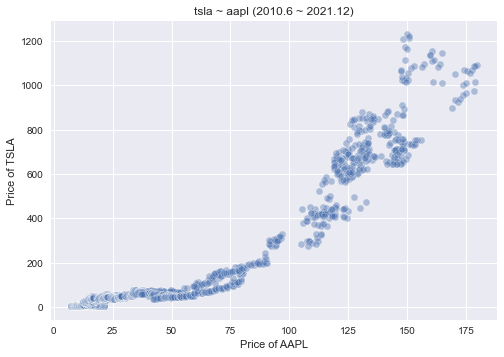

corr : 0.93
p-value : 0.00
--> 양의 상관관계가 있습니다.


In [6]:
aapl = stocks['Close']['AAPL']
tsla = stocks['Close']['TSLA']

sns.scatterplot(x=aapl, y=tsla, alpha=0.4)
plt.title('tsla ~ aapl (2010.6 ~ 2021.12)')
plt.xlabel('Price of AAPL')
plt.ylabel('Price of TSLA')
plt.show()

print_corr_res(aapl, tsla)

상관계수의 절대값이 0.93입니다. 이는 매우 강한 상관관계를 의미합니다.  
주의해야 할 점은 이러한 상관관계의 강도는 위 산점도가 형성하는 기울기가 결정하는 것이 아니라 밀집도가 결정합니다.  
즉, 산점도의 면적이 퍼저있다면 상관계수의 절대값이 0에 가까울 것이고 면접이 좁다면(밀집해 있다면) 상관계수의 절대값이 1에 가까울 것입니다.

### 3-2. 테슬라 거래량과 애플 주가간 상관 분석

테슬라 거래량과 애플 주가는 서로 관련이 없을 것 같습니다.  
그러나 둘 다 나스닥에 속해있고, 애플 주가의 경우 언제나 우상향했다는 점을 고려하면 나스닥에 대한 관심 정도에 따라 둘의 선형 관계가 있지 않을까? 하고 생각해볼 수 있습니다.

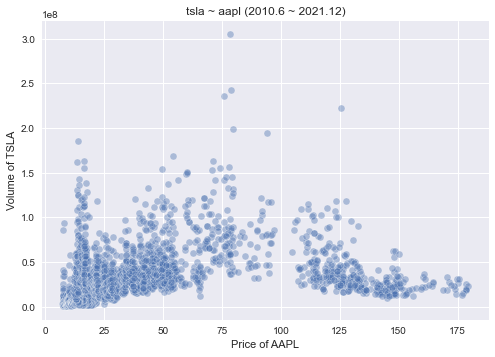

corr : 0.27
p-value : 0.00
--> 양의 상관관계가 있습니다.


In [7]:
tsla_volume = stocks['Volume']['TSLA']

sns.scatterplot(x=aapl, y=tsla_volume, alpha=0.4)
plt.title('tsla ~ aapl (2010.6 ~ 2021.12)')
plt.xlabel('Price of AAPL')
plt.ylabel('Volume of TSLA')
plt.show()

print_corr_res(aapl, tsla_volume)

테슬라 거래량과 애플 주가 사이에는 양의 상관관계가 있었습니다. 그러나 그 강도는 0.27로 약합니다.  
그리고 산점도로 보면 명확한 선형 관계가 있어보이지는 않습니다.  
꾸준히 우상향했던 애플 주가와 달리 테슬라의 경우 최근 주가 변동성과 사회적 관심도가 급변해서인지 애플 주가가 높은 지점(100~125)부터 특히 선형 관계가 무너지는 모습을 볼 수 있습니다. 

### 3-3. 랜덤한 숫자와 애플 주가간 상관 분석

랜덤한 숫자와 애플 주가는 당연히 서로 아무런 관련이 없을 것입니다.  
관련 없는 두 데이터쌍은 산점도와 상관계수가 어떤 모습일지 확인해보겠습니다.

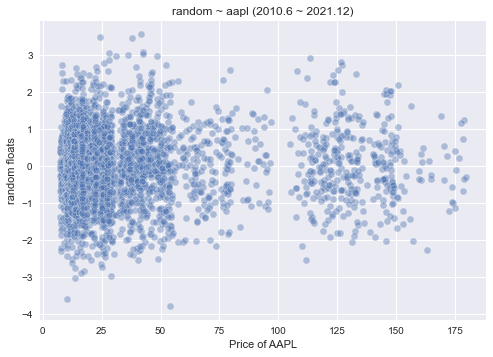

corr : 0.02
p-value : 0.27
--> 상관관계가 유의하지 않습니다.


In [8]:
random_float = np.random.randn(len(aapl))

sns.scatterplot(x=aapl, y=random_float, alpha=0.4)
plt.title('random ~ aapl (2010.6 ~ 2021.12)')
plt.xlabel('Price of AAPL')
plt.ylabel('random floats')
plt.show()

print_corr_res(aapl, random_float)

우선, 산점도는 매우 흩어져있고, 상관계수는 0에 근접합니다.
우리는 이 결과를 보고 '상관관계가 없다'라고 말할 수는 없습니다. 분석 결과 자체가 유의하지 않기(p-value>0.05) 때문입니다.  
상관 분석으로는 둘 사이의 뚜렷한 선형 관계가 존재하지 않는 경우 이러한 결과가 나올 수 있습니다. 비선형 혹은 흩어짐이 심한 관계에 대해서는 상관관계가 있다 혹은 없다를 논하기 전에 상관분석 자체가 의미가 있는가?를 먼저 확인해야 합니다.

## Step 4. 회귀 분석

회귀 분석은 두 데이터쌍의 선형적 인과관계를 검정하는 방법론입니다. 따라서 종속 변수 Y가 특정 독립변수 X에 대해 영향을 받는다는 것을 전제로 합니다.

위에서 봤던 테슬라 주가, 애플 주가의 경우 서로 사건의 선후행 관계가 있다는 가정을 하기 어렵습니다. 그럼, 테슬라 차량 판매대수와 테슬라 주가는 어떨까요?  테슬라 차량 판매대수가 올라가면 테슬라 주가가 올라간다는 가정입니다.

그럴듯해보이지만 주가가 판매대수에 후행한다는 경험적 근거를 확보하지 못한다면 이 분석은 유의미한 결과를 가져다주지 못할 것입니다.  
회귀 분석은 인과관계를 검정하는 방법으로 쓰이지만 종속변수가 경험적으로 독립변수에 영향을 받는다는 사실이 확인되지 않는다면 회귀 분석의 결과가 설령 p-value 값을 근거로 유의하다하더라도 경험적 사실과 다르거나 현실에 적용하기 어려울 것입니다.

### 4-1. MS 주가와 애플 주가간 회귀 분석

예를 들어보겠습니다. 애플 주가와 MS 주가가 서로 무언가 관계가 있을 것이라는 추정(?)을 하고 회귀분석 결과에 의존한다면 어떨까요? 먼저 주가데이터를 가져오겠습니다.

In [9]:
tickers = yf.Tickers(['MSFT','AAPL'])
stocks = tickers.history(start='2010-01-01',end='2022-01-01')
stocks.dropna(inplace=True)
stocks

[*********************100%***********************]  2 of 2 completed


Close             Dividends             High              \
                  AAPL        MSFT      AAPL MSFT        AAPL        MSFT   
Date                                                                        
2009-12-31    6.426001   23.438797       0.0  0.0    6.505896   23.830982   
2010-01-04    6.526019   23.800230       0.0  0.0    6.540961   23.915578   
2010-01-05    6.537303   23.807909       0.0  0.0    6.574201   23.915569   
2010-01-06    6.433320   23.661808       0.0  0.0    6.563224   23.900194   
2010-01-07    6.421426   23.415726       0.0  0.0    6.464728   23.607973   
...                ...         ...       ...  ...         ...         ...   
2021-12-27  179.586868  340.949280       0.0  0.0  179.676494  340.979147   
2021-12-28  178.551132  339.754517       0.0  0.0  180.582734  342.303295   
2021-12-29  178.640778  340.451477       0.0  0.0  179.885626  342.791154   
2021-12-30  177.465637  337.833008       0.0  0.0  179.825881  341.626309   
2021-12-31  176.838226  334.846161       0.0  0.0  178.491374  337.872817   

                   Low                    Open             Stock Splits       \
                  AAPL        MSFT        AAPL        MSFT         AAPL MSFT   
Date                                                                           
2009-12-31    6.420817   23.438797    6.499187   23.823292          0.0    0   
2010-01-04    6.476314   23.523393    6.508332   23.546464          0.0    0   
2010-01-05    6.502845   23.561833    6.544012   23.723321          0.0    0   
2010-01-06    6.426611   23.469561    6.537304   23.746396          0.0    0   
2010-01-07    6.374771   23.215788    6.457105   23.554143          0.0    0   
...                ...         ...         ...         ...          ...  ...   
2021-12-27  176.340308  333.960024  176.360215  333.989892          0.0    0   
2021-12-28  177.794270  338.828599  179.417557  341.646184          0.0    0   
2021-12-29  177.405882  338.191405  178.590981  339.804301          0.0    0   
2021-12-30  177.356090  337.335199  178.730408  340.411654          0.0    0   
2021-12-31  176.529491  334.378219  177.356072  337.026566          0.0    0   

               Volume            
                 AAPL      MSFT  
Date                             
2009-12-31  352410800  31929700  
2010-01-04  493729600  38409100  
2010-01-05  601904800  49749600  
2010-01-06  552160000  58182400  
2010-01-07  477131200  50559700  
...               ...       ...  
2021-12-27   74919600  19947000  
2021-12-28   79144300  15661500  
2021-12-29   62348900  15042000  
2021-12-30   59773000  15994500  
2021-12-31   64062300  18000800  

[3022 rows x 14 columns]

statsmodels 패키지를 활용해 회귀계수와 회귀검정 결과를 도출할 수 있습니다.

In [10]:
import statsmodels.api as sm

aapl = stocks['Close']['AAPL']
msft = stocks['Close']['MSFT']

model = sm.OLS(endog=aapl.values, exog=sm.add_constant(msft.values)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.012e+05
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:57:50   Log-Likelihood:                -9964.2
No. Observations:                3022   AIC:                         1.993e+04
Df Residuals:                    3020   BIC:                         1.994e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8992      0.173      5.199      0.000       0.560       1.238
x1             0.4903      0.002    318.124      0.000       0.487       0.493
==============================================================================
Omnibus:                      118.970   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.770
Skew:                          -0.013   Prob(JB):                     6.18e-80
Kurtosis:                       4.702   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model.params

array([0.89921362, 0.49027843])

종속변수를 애플 주가, 독립변수를 MS 주가로 두고, 상수항을 추가했습니다.  
분석 결과 상수항은 0.9, x 계수는 0.49입니다. 두 항은 모두 `p-value<0.05`로 유의합니다. 오차(분산) 설명력을 의미하는 R-squared 값도 1에 매우 근접해서 둘 사이 관계가 매우 강해 보입니다.  
애플 주가, MS 주가, 회귀선 순으로 시각화까지 이어서 수행해보겠습니다.

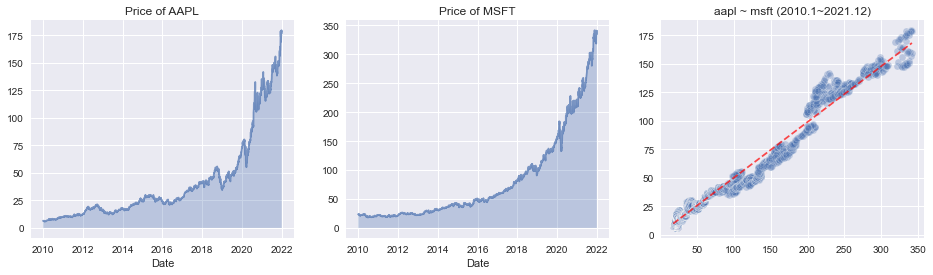

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

sns.lineplot(x=aapl.index, y=aapl.values, ax=axes[0], alpha=0.7)
axes[0].fill_between(x=aapl.index, y1=aapl.values, alpha=0.3)
axes[0].set_title('Price of AAPL')

sns.lineplot(x=msft.index, y=msft.values, ax=axes[1], alpha=0.7)
axes[1].fill_between(x=msft.index, y1=msft.values, alpha=0.3)
axes[1].set_title('Price of MSFT')

sns.scatterplot(y=aapl.values, x=msft.values, ax=axes[2], alpha=0.3)
sns.lineplot(y=msft.values*model.params[1]+model.params[0], x=msft.values, color='r', alpha=0.7, linestyle='--')
axes[2].set_title('aapl ~ msft (2010.1~2021.12)')

plt.show()

어떤가요? 매우 강한 인과관계가 있다고 할 수 있을까요? 

그렇지 않습니다. 모델은 종속변수와 독립변수간 인과관계가 있을 것이라는 가정 하에 분석을 수행합니다. 그리고 그 결과가 유의한지, 인과성의 강도는 어떤지 알려줄 것입니다.  
따라서 모델을 적합시키기(fitting) 전에 두 변수가 시간적으로 선, 후행 관계를 가지고 영향을 미친다는 것을 경험적으로 판단할 수 있어야 그 결과에 대한 의미있는 해석 역시 가능합니다.
애플 주가와 MS 주가가 매우 유사한 양상을 띄는 것은 사실이지만 MSFT 주가 움직임이 AAPL 주가에 대해 시간적으로 선행하여 영향을 미쳤다고 보기는 어렵습니다. 따라서 위 회귀분석 결과는 전제의 오류를 포함하고 있습니다.

### 4-2. 전날 MS 종가와 다음 날 거래량간 회귀 분석

그렇다면 이번에는 다르게 접근해보겠습니다. 독립변수는 전날의 MS 종가를, 종속변수는 다음 날의 MS 거래량을 사용하겠습니다.  
시간적으로 선, 후행 관계에 있으며 경험적으로 전날 종가가 다음날 거래량의 움직임에 영향을 줄 수 있을 것입니다.  

물론, 그 영향의 정도가 약하거나 심지어 영향의 여부조차 없을 수 있습니다. 이렇게 인과성이 있다고 생각하지만 그 정도나 여부가 확실하지 않을 때 회귀 분석을 사용하면 됩니다.

In [13]:
msft_prev_close = stocks['Close']['MSFT'][:-1]
msft_next_volume = stocks['Volume']['MSFT'][1:]

전날 주가(`msft_prev_close`)는 마지막 날을 제외하고, 다음날 거래량(`msft_next_volume`)은 첫째 날을 재외합니다. 그렇게 했을 때 두 데이터는 길이는 같지만 시점을 선, 후행으로 묶을 수 있습니다.

In [14]:
msft_prev_close

Date
2009-12-31     23.438797
2010-01-04     23.800230
2010-01-05     23.807909
2010-01-06     23.661808
2010-01-07     23.415726
                 ...    
2021-12-23    333.223267
2021-12-27    340.949280
2021-12-28    339.754517
2021-12-29    340.451477
2021-12-30    337.833008
Name: MSFT, Length: 3021, dtype: float64

In [15]:
msft_next_volume

Date
2010-01-04    38409100
2010-01-05    49749600
2010-01-06    58182400
2010-01-07    50559700
2010-01-08    51197400
                ...   
2021-12-27    19947000
2021-12-28    15661500
2021-12-29    15042000
2021-12-30    15994500
2021-12-31    18000800
Name: MSFT, Length: 3021, dtype: int64

앞에서 확인한 것처럼 마찬가지로 OLS 함수를 사용해 회귀분석을 수행합니다.

In [16]:
model = sm.OLS(endog=msft_next_volume.values, exog=sm.add_constant(msft_prev_close.values)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     366.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           3.11e-77
Time:                        19:57:54   Log-Likelihood:                -55189.
No. Observations:                3021   AIC:                         1.104e+05
Df Residuals:                    3019   BIC:                         1.104e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.621e+07    5.5e+05     84.093      0.000    4.51e+07    4.73e+07
x1         -9.389e+04   4903.265    -19.149      0.000   -1.04e+05   -8.43e+04
==============================================================================
Omnibus:                     2126.584   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58826.214
Skew:                           2.982   Prob(JB):                         0.00
Kurtosis:                      23.779   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value를 볼 때 두 계수는 유의미합니다. 그러나 R-squre를 고려할 때 설명력이 높지는 않습니다.

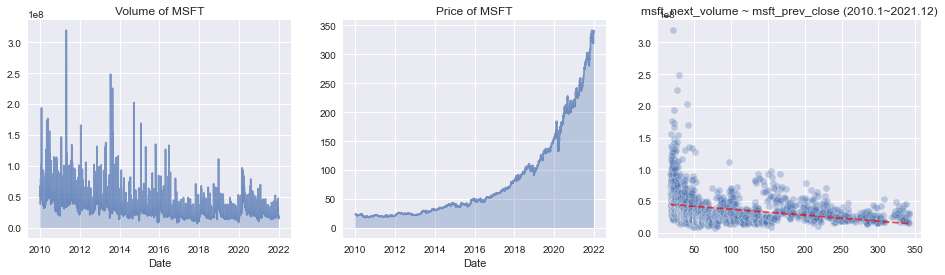

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

sns.lineplot(x=msft_next_volume.index, y=msft_next_volume.values, ax=axes[0], alpha=0.7)
axes[0].fill_between(x=msft_next_volume.index, y1=msft_next_volume.values, alpha=0.3)
axes[0].set_title('Volume of MSFT')

sns.lineplot(x=msft_prev_close.index, y=msft_prev_close.values, ax=axes[1], alpha=0.7)
axes[1].fill_between(x=msft_prev_close.index, y1=msft_prev_close.values, alpha=0.3)
axes[1].set_title('Price of MSFT')

sns.scatterplot(y=msft_next_volume.values, x=msft_prev_close.values, ax=axes[2], alpha=0.3)
sns.lineplot(y=msft_prev_close.values*model.params[1]+model.params[0], x=msft_prev_close.values, color='r', alpha=0.7, linestyle='--')
axes[2].set_title('msft_next_volume ~ msft_prev_close (2010.1~2021.12)')

plt.show()

MS 거래량은 전날 종가로부터 약한 영향을 받습니다. 종가가 오르면 거래량이 떨어질 확률이 더 높다는 것을 의미합니다. 이는 우연히 발생한다기보다 그럴 확률이 유의하게 높기 때문에 인과관계가 존재합니다.  
그러나 거래량을 전날 종가로만 설명하는 것은 설명력이 매우 떨어집니다. 그 외 다른 변인들이 너무나 많을 것이며, 흩어진 산점도와 낮은 기울기, R-squre가 모두 낮은 설명력을 보여주고 있습니다.  


이렇게 회귀분석을 통해 우리가 인과관계가 있다고 추정하는 것을 검정해볼 수 있습니다. 상관분석과 회귀분석의 가장 중요한 차이는 여기에 있습니다. 회귀 분석은 상관 분석과 달리 시간적 인과성을 검증할 수 있습니다. 물론, 경험적 인과성을 토대로 검증하고자 하는 종속 및 독립 변수가 명확해야 하겠습니다.